In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [50]:
# Read the csv file into pandas Dataframe
credit_data_df = pd.read_csv('Resources/credit_data_cleaned.csv')
credit_data_df.head()


,Unnamed: 0,month,age,occupation,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,...,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_age_new
0,0,January,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,None,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,22.083333333333332
1,1,February,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,None
2,3,April,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,22.333333333333332
3,4,May,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,22.416666666666668
4,5,June,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,No,49.574949,62.430172,Other,340.479212,Good,22.5


In [51]:
credit_data_df['credit_score'].value_counts()

Standard    48317
Poor        26078
Good        16282
Name: credit_score, dtype: int64

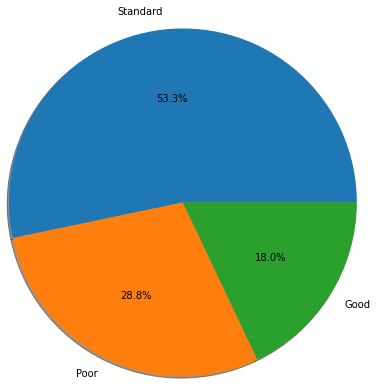

In [52]:
label = credit_data_df.credit_score.value_counts().index
label_count = credit_data_df.credit_score.value_counts().values
plt.pie(data=credit_data_df, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=2)
plt.show()

In [53]:
credit_data_df.monthly_balance = credit_data_df.monthly_balance.astype(float)

In [54]:
# credit_data_10 = pd.get_dummies(credit_data_9,prefix = ['credit_score'],columns=['credit_score'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in credit_data_df.columns:
    if (credit_data_df[i].dtypes == 'object'):
        credit_data_df[i] = le.fit_transform(credit_data_df[i])
       

In [55]:
credit_data_df.head()

,Unnamed: 0,month,age,occupation,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,...,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_age_new
0,0,3,23,13,19114.12,3,4,3,4,127,...,2,809.98,26.822620,1,49.574949,80.415295,2,312.494089,0,180
1,1,2,23,13,19114.12,3,4,3,4,127,...,1,809.98,31.944960,1,49.574949,118.280222,3,284.629162,0,404
2,3,0,23,13,19114.12,3,4,3,4,127,...,1,809.98,31.377862,1,49.574949,199.458074,5,223.451310,0,183
3,4,7,23,13,19114.12,3,4,3,4,127,...,1,809.98,24.797347,1,49.574949,41.420153,1,341.489231,0,184
4,5,5,23,13,19114.12,3,4,3,4,127,...,1,809.98,27.262259,1,49.574949,62.430172,6,340.479212,0,185


In [56]:
# making our train x data the features that had the most importances as per RF feature importance table
credit_data_df2 = credit_data_df[["credit_mix", "interest_rate", "num_credit_inquiries","credit_utilization_ratio","credit_score"]]
credit_data_df2.head()

,credit_mix,interest_rate,num_credit_inquiries,credit_utilization_ratio,credit_score
0,2,3,4.0,26.822620,0
1,1,3,4.0,31.944960,0
2,1,3,4.0,31.377862,0
3,1,3,4.0,24.797347,0
4,1,3,4.0,27.262259,0


In [ ]:
# playing with features
credit_data_df2 = credit_data_df[["credit_mix", "interest_rate", "num_credit_inquiries","credit_utilization_ratio","credit_score"]]
credit_data_df2.head()

In [57]:
# create training and testing data
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)
trainM, testM = train_test_split(credit_data_df2, test_size=0.3)
# trainM, testM = train_test_split(credit_data_df2, test_size=0.3)

In [58]:
train_y = trainM[["credit_score"]]
# train_x = trainM.drop(["credit_score","changed_credit_limit"], axis=1) 
train_x = trainM.drop(["credit_score"], axis=1) 

test_y = testM[["credit_score"]]

# test_x = testM.drop(["credit_score","changed_credit_limit"], axis=1)
test_x = testM.drop(["credit_score"], axis=1)

In [60]:
# scale data
from sklearn.preprocessing import RobustScaler

ro_scaler = RobustScaler()
train_x = ro_scaler.fit_transform(train_x)
test_x = ro_scaler.fit_transform(test_x)

In [61]:
#fit the model to the training data & calculate training and testing data scores
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
lr = LogisticRegression(C = 100)
lr.fit(train_x , train_y)

training_score = lr.score(train_x , train_y)
testing_score = lr.score(test_x , test_y)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.6030280591747672
Testing Score: 0.6068960446993089


In [62]:
predictions = lr.predict(test_x)
print(f"Predictions: {predictions}")

Predictions: [1 2 1 ... 2 0 2]


In [63]:
# KNN MODEL
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier(n_neighbors=13)

In [65]:
knn.fit(train_x , train_y)

KNeighborsClassifier(n_neighbors=13)

In [66]:
knn.score(train_x , train_y)

0.6782568966332141

In [67]:
knn.score(test_x , test_y)

0.6280326422584914

In [68]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

In [73]:
# rf = RandomForestClassifier(max_features=5 ,    max_depth=4)
rf = RandomForestClassifier(max_features=0 ,    max_depth=5)

In [74]:
rf.fit(train_x , train_y)

ValueError: max_features must be in (0, n_features]

In [ ]:
rf.score(train_x ,train_y)

0.6517259307106958

In [ ]:
rf.score(test_x , test_y)

0.6503455374209675

In [ ]:
sorted(zip(rf.feature_importances_,credit_data_df.columns),reverse=True)

[(0.23027172858895303, 'credit_mix'),
 (0.21238664971146298, 'interest_rate'),
 (0.15270447724792433, 'num_credit_inquiries'),
 (0.08720623438899959, 'delay_from_due_date'),
 (0.08197371637794545, 'credit_utilization_ratio'),
 (0.06722868131730439, 'num_credit_card'),
 (0.06573651125637674, 'changed_credit_limit'),
 (0.04171704598945596, 'num_bank_accounts'),
 (0.031268152325053304, 'num_of_loan'),
 (0.014396242648627376, 'num_of_delayed_payment'),
 (0.0042337373569143934, 'monthly_balance'),
 (0.0038252443527861772, 'annual_income'),
 (0.0017571495147693063, 'payment_of_min_amount'),
 (0.0013324028263346846, 'type_of_loan'),
 (0.001330991013072237, 'age'),
 (0.0009946695789059257, 'payment_behaviour'),
 (0.0005739727659625893, 'month'),
 (0.00038977858616737546, 'total_emi_per_month'),
 (0.00033019711883718435, 'Unnamed: 0'),
 (0.0002660413892261519, 'amount_invested_monthly'),
 (6.216698554695599e-05, 'outstanding_debt'),
 (1.4208659373695745e-05, 'occupation')]